In [3]:
import pandas as pd
import numpy as np
from pydmd import MrDMD
from pydmd import DMD
from plot_eigs import *
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns  # for nicer graphics

matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['font.family'] = ['DejaVu Serif']
font = font_manager.FontProperties(family='DejaVu Serif',
                                   weight='normal',
                                   style='normal', size=20)

matplotlib.rc('axes', linewidth=2)

In [12]:

array_of_files = np.concatenate([np.arange(84,-4,-4),np.arange(88,104,4)])
print(array_of_files)

[ 84  80  76  72  68  64  60  56  52  48  44  40  36  32  28  24  20  16
  12   8   4   0  88  92  96 100]


In [13]:
#system = 'fixed_coeff'
system = 'general'

In [14]:
path = '/home/biswajit/Documents/MRDMD/general/'

PIVEC_ALL = []
#headers = []
for each in array_of_files:
    print(each)
    df = pd.read_csv('%s/%s.cube'%(path,each),skiprows=15,delimiter='  ')
    array = df.dropna(axis=1)
    array = np.array(array).reshape(576000*6,1)
    PIVEC_ALL.append(array)

84


/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


80
76
72
68
64
60
56
52
48
44
40
36
32
28
24
20
16
12
8
4
0
88
92
96
100


In [6]:
data = PIVEC_ALL[0].reshape(180,160,120)
import pyvista as pv

d = pv.wrap(data)
d.plot(volume=True,jupyter_backend='ipyvtklink') # Volume render

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [5]:
jupyter nbextension list
jupyter nbextension install --py --symlink --sys-prefix pythreejs
jupyter nbextension enable --py --sys-prefix pythreejs
jupyter nbextension list

SyntaxError: invalid syntax (2168090346.py, line 1)

[False False False ... False False False]
[[5.42422240e-14]
 [6.92630843e-14]
 [8.80805254e-14]
 ...
 [3.50065984e-14]
 [2.75955187e-14]
 [2.16657995e-14]]


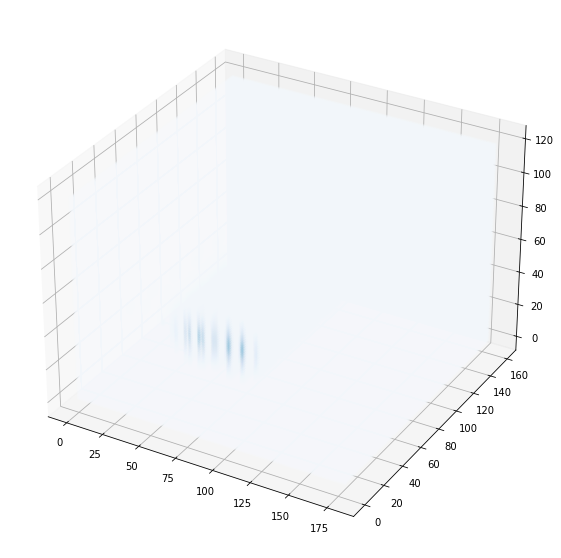

In [26]:
from itertools import product
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")

x_ = np.arange(0, 180, 1)
y_ = np.arange(0, 160, 1)
z_ = np.arange(0, 120, 1)

x, y, z = np.meshgrid(x_, y_, z_, indexing='ij')

mask = PIVEC_ALL[0][..., 0] < -0.003
print(mask)
# Set all masked pixels to zero
masked = PIVEC_ALL[0].copy()
masked[mask] = 0
print(masked)

ax.scatter(x, y, z, c=masked, s=5, cmap=plt.cm.Blues, alpha=0.2)

In [15]:
PIVEC_ALL = np.array(PIVEC_ALL).reshape(26, 3456000)

In [16]:
sub_dmd = DMD(svd_rank=0, exact=False, opt=False)
dmd = MrDMD(sub_dmd, max_level=3, max_cycles=1)
dmd.fit(X=np.array(PIVEC_ALL,dtype='complex128').T)

/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/pydmd/dmdbase.py:719: UserWarning: Input data matrix X has condition number 3.4027594369626125e+17. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  cond_number


The number of eigenvalues is 14


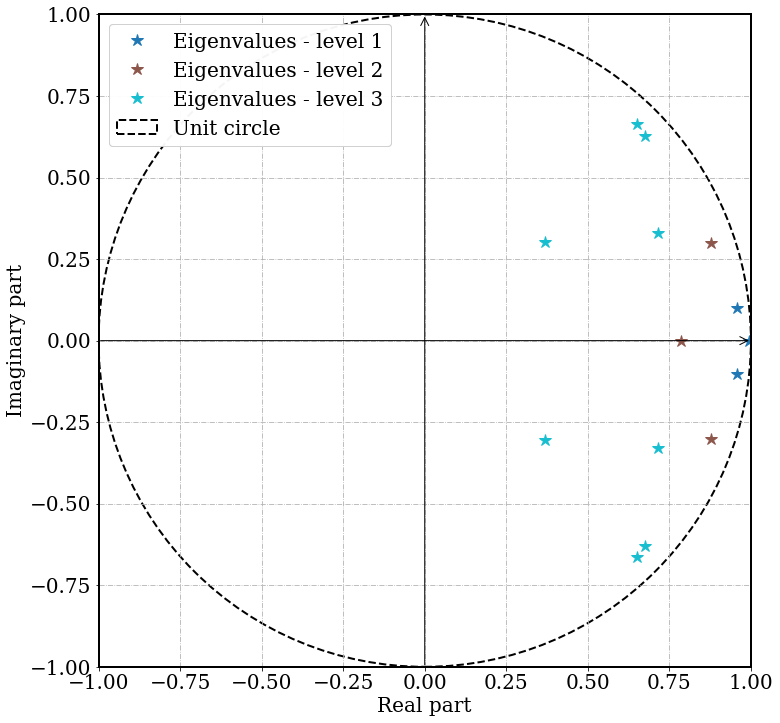

In [39]:
#print number of eigenvalues
print('The number of eigenvalues is {}'.format(dmd.eigs.shape[0]))
from plot_eigs_paths import *
plot_eigs_path(dmd,path=path, system=system,show_axes=True, show_unit_circle=True, figsize=(12, 12))
#fig.savefig('%s/correct_eigan_val_in_complex_plane_%s' %(path,system))

[-0.03726422 -0.00712615 -0.03726422 -0.07612284 -0.07612284 -0.24286638
 -0.07964655 -0.07964655 -0.07342175 -0.07342175 -0.24072014 -0.24072014
 -0.74126596 -0.74126596]


/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/matplotlib/axes/_axes.py:4193: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


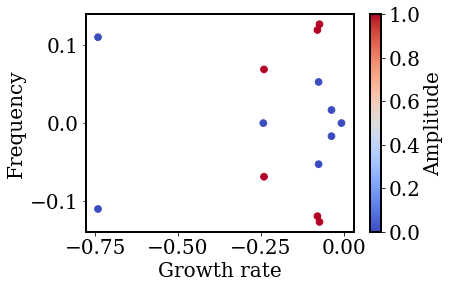

In [18]:
#DMD modes with zero growth rate capture the periodic base flow
def frequency(self):
        """
        Get the amplitude spectrum.
        :return: the array that contains the frequencies of the eigenvalues.
        :rtype: numpy.ndarray
        """
        return np.log(self.eigs).imag / (2 * np.pi * self.original_time["dt"])
    

#print(frequency(dmd))
freq_imag = frequency(dmd)
real_log_eigen = np.log(dmd.eigs).real
print(real_log_eigen)

def time_window_amplitudes(self, t0, tend):
        """
        Get the amplitudes relative to the modes of the bins embedded (partially
        or totally) in a given time window.

        :param float t0: start time of the window.
        :param float tend: end time of the window.
        :return: the amplitude of the modes for that time window.
        :rtype: numpy.ndarray
        """
        indexes = self.time_window_bins(t0, tend)
        return np.concatenate([self.dmd_tree[idx].amplitudes for idx in indexes])

#print('amp:',time_window_amplitudes(dmd, 0, 10))
amplitude = time_window_amplitudes(dmd, 0, 26)
#print(amplitude)
plt.scatter(real_log_eigen,freq_imag,c=amplitude, s=45, lw=1, cmap='coolwarm',vmin = 0, vmax = 1)
cbar = plt.colorbar()
cbar.set_label('Amplitude')
plt.ylabel('Frequency')
plt.xlabel('Growth rate')
plt.savefig('%s/correct_real_log_eigen_vs_freq_imag_%s.png' %(path,system),dpi=600)

/home/biswajit/anaconda3/envs/priyo/lib/python3.7/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


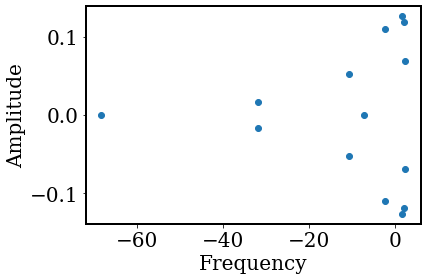

In [19]:
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.scatter(amplitude,freq_imag)
plt.savefig('%s/correct_amplitude_vs_freq_imag_%s.png'%(path,system),dpi=600)

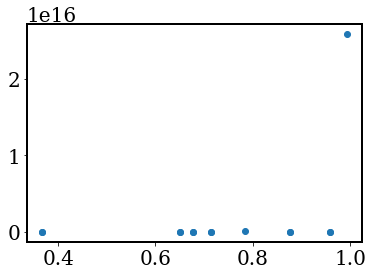

In [20]:
def growth_rate(self):  # To check
        """
        Get the growth rate values relative to the modes.
        :return: the Floquet values
        :rtype: numpy.ndarray
        """
        return self.eigs.real / self.original_time["dt"]
plt.scatter(growth_rate(dmd),1/freq_imag)
plt.savefig('%s/correct_growth_rate_vs_1_by_freq_imag_%s.png'%(path,system),dpi=600)


(3456000, 14)
dmd.reconstructed_data.shape: (3456000, 26)
partial_modes_shape: (3456000, 3)


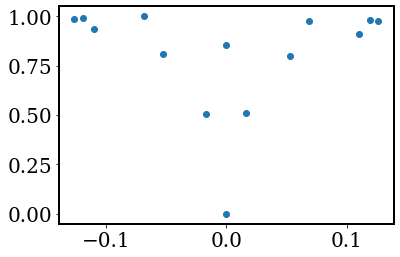

In [22]:

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
plt.scatter(freq_imag,NormalizeData(amplitude))
plt.savefig('%s/correct_freq_imag_vs_norm_amplitude_%s.png'%(path,system),dpi=600)


#print number of modes
print(np.array(dmd.modes).shape)

print('dmd.reconstructed_data.shape:',dmd.reconstructed_data.shape)

modes = dmd.partial_modes(0, node=None)
print('partial_modes_shape:',modes.shape)

partial_dynamics_shape: (3, 26)


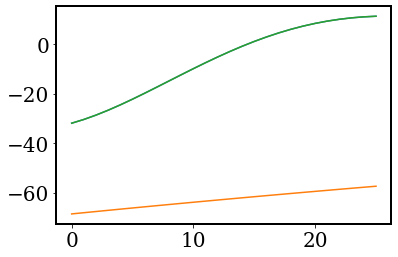

In [23]:
num_frames = 26
def partial_dynamics(self, level, node=None):
        """
        Return the time evolution of the specific `level` and of the specific
        `node`; if `node` is not specified, the method returns the time
        evolution of the given `level` (all the nodes). The dynamics are always
        reported to the original time window.
        :param int level: the index of the level from where the time evolution
            is extracted.
        :param int node: the index of the node from where the time evolution is
            extracted; if None, the time evolution is extracted from all the
            nodes of the given level. Default is None.
        :return: the selected dynamics stored by row
        :rtype: numpy.ndarray
        """
        leaves = self.dmd_tree.index_leaves(level) if node is None else [node]

        dynamics = []
        for i, leaf in enumerate(leaves):
            d = self.dmd_tree[level, leaf].dynamics
            base = np.zeros(shape=(d.shape[0], num_frames), dtype=d.dtype) #TODO
            time_interval = self.partial_time_interval(level, leaf)
            base[:, int(time_interval['t0']):int(time_interval['tend'])] = d
            dynamics.append(base)

        dynamics = np.vstack(dynamics)
        return dynamics


dynamics = partial_dynamics(dmd, level=0,node=None)
print('partial_dynamics_shape:',dynamics.shape)

partial_reconstructed_data = modes.dot(dynamics)
plt.plot(np.arange(0,num_frames,1), dynamics.real.T)
plt.savefig('%s/correct_partial_dynamics_level_0_%s.png'%(path,system),dpi=600)

In [24]:
for i in range(1, 3):
    print('level for reconstruction work:',i)
    #print(partial_dynamics(dmd, level=i,node=None))
    modes = dmd.partial_modes(level=i, node=None)
    partial_reconstructed_data += modes.dot(partial_dynamics(dmd, level=i,node=None))
    print(partial_reconstructed_data.shape)


print('partial_mode_shape for level 0:',dmd.partial_modes(level=0).shape)

level for reconstruction work: 1
(3456000, 26)
level for reconstruction work: 2


ValueError: could not broadcast input array from shape (2,7) into shape (2,6)

In [76]:
headers[0]

'                          Bergman cyclization density\n              Electron density from Total SCF Density\n       -10   -7.332067    8.999898   -5.996874    1  \n              160    0.100000    0.000000   -0.000059\n              180    0.000000   -0.100000    0.000002\n              120    0.000059    0.000002    0.100000\n    6    6.000000   -2.328506   -1.308413    0.000329\n    1    1.000000   -4.085961   -2.304875    0.001116\n    6    6.000000   -2.328508    1.308410    0.000287\n    1    1.000000   -4.085966    2.304871    0.001227\n    6    6.000000    0.010450   -2.615230   -0.000989\n    6    6.000000    0.010447    2.615229   -0.001166\n    6    6.000000    2.300657   -1.790140    0.000363\n    1    1.000000    4.190377   -2.465208    0.000522\n    6    6.000000    2.300656    1.790143    0.000570\n    1    1.000000    4.190371    2.465216    0.000776'

In [27]:
string="""Bergman cyclization density
Electron density from Total SCF Density
   10   -7.332067    8.999898   -5.996874    1
  160    0.100000    0.000000   -0.000059
  180    0.000000   -0.100000    0.000002
  120    0.000059    0.000002    0.100000
    6    6.000000   -2.328506   -1.308413    0.000329
    1    1.000000   -4.085961   -2.304875    0.001116
    6    6.000000   -2.328508    1.308410    0.000287
    1    1.000000   -4.085966    2.304871    0.001227
    6    6.000000    0.010450   -2.615230   -0.000989
    6    6.000000    0.010447    2.615229   -0.001166
    6    6.000000    2.300657   -1.790140    0.000363
    1    1.000000    4.190377   -2.465208    0.000522
    6    6.000000    2.300656    1.790143    0.000570
    1    1.000000    4.190371    2.465216    0.000776"""

path = '/home/biswajit/Documents/MRDMD/general/correct_general_mode_cubes'

def insert(originalfile,string):
    with open(originalfile,'r') as f:
        with open('%s/nfile.txt'%(path),'w') as f2:
            f2.write(string)
            f2.write(f.read()[35:])
    os.rename('%s/nfile.txt'%(path),originalfile+'.cube')

    
for level in np.arange(0,4,1):
    print('partial_mode_shape:',dmd.partial_modes(level=level).shape)
    for ndx, mode in enumerate(dmd.partial_modes(level=level).T):
        print('level:',level)
        mode_0_reshape = np.array(mode).reshape(576000,6)

        if np.iscomplexobj(mode_0_reshape)==False:
            columns = [f'col_{num}' for num in range(6)]
            index = [f'index_{num}' for num in range(576000)]
            df_reshape = pd.DataFrame(mode_0_reshape, columns=columns, index=index)
            df_reshape.to_csv('%s/correct_density_ndx_%s_level_%s_%s' % (path,ndx,level,system), sep=' ',index=False)
            insert('%s/correct_density_ndx_%s_level_%s_%s' % (path,ndx,level,system),string)

        else:

            columns = [f'col_{num}' for num in range(6)]
            index = [f'index_{num}' for num in range(576000)]
            df_reshape = pd.DataFrame(mode_0_reshape, columns=columns, index=index)
            df_reshape.apply(np.real).to_csv('%s/correct_density_ndx_%s_level_%s_%s_realpart' % (path,ndx,level,system), sep=' ',index=False)
            insert('%s/correct_density_ndx_%s_level_%s_%s_realpart' % (path,ndx,level,system),string)
            df_reshape.apply(np.imag).to_csv('%s/correct_density_ndx_%s_level_%s_%s_imagpart' % (path,ndx,level,system), sep=' ',index=False)
            insert('%s/correct_density_ndx_%s_level_%s_%s_imagpart' % (path,ndx,level,system),string)

partial_mode_shape: (3456000, 3)
level: 0
level: 0
level: 0
partial_mode_shape: (3456000, 3)
level: 1
level: 1
level: 1
partial_mode_shape: (3456000, 8)
level: 2
level: 2
level: 2
level: 2
level: 2
level: 2
level: 2
level: 2
partial_mode_shape: (3456000, 0)


In [61]:
dmd.partial_modes(level=1).T[0].shape

(3456000,)

In [62]:
modes.shape[-1]

4

(3456000, 1)
dynamics shape:, (3, 26) 3
(1, 26)
shape of recons snap: (26, 3456000)
percent_reconstruction_error: 99.11928854322399
percent_reconstruction_error: 99.11348965236911
percent_reconstruction_error: 99.11464660455754
percent_reconstruction_error: 99.04668383871127
percent_reconstruction_error: 98.952005165634
percent_reconstruction_error: 98.90463630645444
percent_reconstruction_error: 98.77955730528201
percent_reconstruction_error: 98.4341779168668
percent_reconstruction_error: 97.9263611350622
percent_reconstruction_error: 97.60616982942445
percent_reconstruction_error: 97.37881507551724
percent_reconstruction_error: 97.1825963795996
percent_reconstruction_error: 96.85748472841289
percent_reconstruction_error: 96.41807113583506
percent_reconstruction_error: 95.99032841897315
percent_reconstruction_error: 95.83156733470297
percent_reconstruction_error: 95.88802269102773
percent_reconstruction_error: 95.94898815662451
percent_reconstruction_error: 95.82607101755003
percent_r

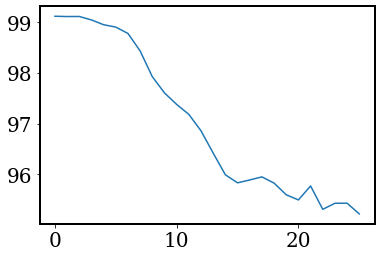

In [28]:
level = 0
modes = dmd.partial_modes(level=level)
print(modes.T[0].T[:,None].shape)
#for mode in modes
first_mode = modes.T[0].T[:,None]
dynamics = dmd.partial_dynamics(level=level)
print('dynamics shape:,',dynamics.shape, dynamics.shape[0])
first_mode_dynamics = dynamics[0][None,:]
print(dynamics[0][None,:].shape)
#modes.dot(dynamics).T.shape
#first_mode.dot(first_mode_dynamics).T.shape
reconstuctured_snapshots_from_first_mode = first_mode.dot(first_mode_dynamics).T
print('shape of recons snap:',reconstuctured_snapshots_from_first_mode.shape)

percent_error_mode_wise = []
for _ in np.arange(0,26,1):
    recons_error = PIVEC_ALL[_]-np.array(reconstuctured_snapshots_from_first_mode[_]).real
    frobenius_norm = np.linalg.norm(recons_error)
    original_norm = np.linalg.norm(PIVEC_ALL[_])
    percent_reconstruction_error = (frobenius_norm/original_norm)*100
    print('percent_reconstruction_error:',percent_reconstruction_error)
    percent_error_mode_wise.append(percent_reconstruction_error)
    
plt.plot(percent_error_mode_wise)

    

dynamics shape in level 0 is (3, 26)
number_of_modes_in_level 0 is 3
mode_index:, 0 0
(1, 26)
shape of recons snap: (26, 3456000)
percent_reconstruction_error: 99.11928854322399 62.95211465284615 63.51146742280536
percent_reconstruction_error: 99.11348965236911 63.029095347428125 63.5928525657774
percent_reconstruction_error: 99.11464660455754 63.00670326004492 63.569518147429605
percent_reconstruction_error: 99.04668383871127 62.912528781996414 63.5180566816794
percent_reconstruction_error: 98.952005165634 62.95496866531602 63.621721015088895
percent_reconstruction_error: 98.90463630645444 62.88314569694463 63.5795732589342
percent_reconstruction_error: 98.77955730528201 63.01495577390258 63.7935191176778
percent_reconstruction_error: 98.4341779168668 62.58436256671018 63.57991085125554
percent_reconstruction_error: 97.9263611350622 62.35587717288738 63.67629354355849
percent_reconstruction_error: 97.60616982942445 62.04682814482013 63.568551304955975
percent_reconstruction_error: 97.

percent_reconstruction_error: 100.0 63.609435429700994 63.609435429700994
percent_reconstruction_error: 100.0 63.55514380624537 63.55514380624537
percent_reconstruction_error: 100.0 63.423807103801494 63.423807103801494
percent_reconstruction_error: 100.0 63.27322335903803 63.27322335903803
percent_reconstruction_error: 100.0 63.039674683563156 63.039674683563156
percent_reconstruction_error: 100.0 63.039674683563156 63.039674683563156
percent_reconstruction_error: 100.0 62.99525736765473 62.99525736765473
percent_reconstruction_error: 100.0 63.0383481612256 63.0383481612256
percent_reconstruction_error: 100.0 63.36455298326399 63.36455298326399
mode_index:, 1 1
(1, 26)
shape of recons snap: (26, 3456000)
percent_reconstruction_error: 100.93259070434337 64.1037694641825 63.51146742280536
percent_reconstruction_error: 100.60213964409452 63.97577034188653 63.5928525657774
percent_reconstruction_error: 100.17239440847774 63.67910844221202 63.569518147429605
percent_reconstruction_error: 9

percent_reconstruction_error: 100.0 63.57997841498309 63.57997841498309
percent_reconstruction_error: 100.0 63.609435429700994 63.609435429700994
percent_reconstruction_error: 100.0 63.55514380624537 63.55514380624537
percent_reconstruction_error: 100.0 63.423807103801494 63.423807103801494
percent_reconstruction_error: 100.0 63.27322335903803 63.27322335903803
percent_reconstruction_error: 100.0 63.039674683563156 63.039674683563156
percent_reconstruction_error: 100.0 63.039674683563156 63.039674683563156
percent_reconstruction_error: 100.0 62.99525736765473 62.99525736765473
percent_reconstruction_error: 100.0 63.0383481612256 63.0383481612256
percent_reconstruction_error: 100.0 63.36455298326399 63.36455298326399
mode_index:, 2 2
(1, 26)
shape of recons snap: (26, 3456000)
percent_reconstruction_error: 100.0 63.51146742280536 63.51146742280536
percent_reconstruction_error: 100.0 63.5928525657774 63.5928525657774
percent_reconstruction_error: 100.0 63.569518147429605 63.5695181474296

percent_reconstruction_error: 99.82361522663636 63.311937165382865 63.423807103801494
percent_reconstruction_error: 100.0 63.27322335903803 63.27322335903803
percent_reconstruction_error: 100.0 63.039674683563156 63.039674683563156
percent_reconstruction_error: 100.0 63.039674683563156 63.039674683563156
percent_reconstruction_error: 100.0 62.99525736765473 62.99525736765473
percent_reconstruction_error: 100.0 63.0383481612256 63.0383481612256
percent_reconstruction_error: 100.0 63.36455298326399 63.36455298326399
mode_index:, 6 2
(1, 26)
shape of recons snap: (26, 3456000)
percent_reconstruction_error: 100.0 63.51146742280536 63.51146742280536
percent_reconstruction_error: 100.0 63.5928525657774 63.5928525657774
percent_reconstruction_error: 100.0 63.569518147429605 63.569518147429605
percent_reconstruction_error: 100.0 63.5180566816794 63.5180566816794
percent_reconstruction_error: 100.0 63.621721015088895 63.621721015088895
percent_reconstruction_error: 100.0 63.5795732589342 63.579

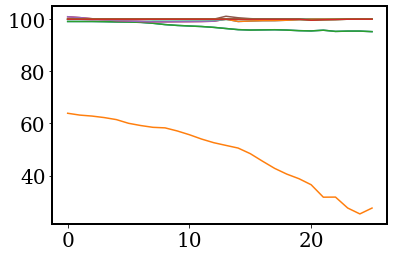

In [29]:
percent_error_alllevels_wise = []
for level in np.arange(0,4,1):
    modes = dmd.partial_modes(level=level)
    #print(modes.T[0].T[:,None].shape)
    number_of_modes_in_level = modes.T.shape[-2]
    dynamics = dmd.partial_dynamics(level=level)
    print('dynamics shape in level {} is {}'.format(level,dynamics.shape))
    print('number_of_modes_in_level {} is {}'.format(level,number_of_modes_in_level))
    percent_error_level_wise = []
    for mode_index in np.arange(0, number_of_modes_in_level):
        print('mode_index:,',mode_index, level)
        #for mode in modes
        selected_mode = modes.T[mode_index].T[:,None]
        selected_mode_dynamics = dynamics[mode_index][None,:]
        print(dynamics[mode_index][None,:].shape)
        #modes.dot(dynamics).T.shape
        #first_mode.dot(first_mode_dynamics).T.shape
        reconstuctured_snapshots_from_selected_mode = selected_mode.dot(selected_mode_dynamics).T
        print('shape of recons snap:',reconstuctured_snapshots_from_selected_mode.shape)

        percent_error_mode_wise = []
        for _ in np.arange(0,26,1):
            recons_error = PIVEC_ALL[_]-np.array(reconstuctured_snapshots_from_selected_mode[_]).real
            #print(recons_error.shape,PIVEC_ALL[_].shape )
            frobenius_norm = np.linalg.norm([recons_error])
            original_norm = np.linalg.norm([PIVEC_ALL[_]])
            percent_reconstruction_error = (frobenius_norm/original_norm)*100
            print('percent_reconstruction_error:',percent_reconstruction_error,frobenius_norm, original_norm)
            percent_error_mode_wise.append(percent_reconstruction_error)
        percent_error_level_wise.append(percent_error_mode_wise)
        percent_error_alllevels_wise.append(percent_error_mode_wise)

for percent_error_mode in percent_error_alllevels_wise:
    plt.plot(percent_error_mode)


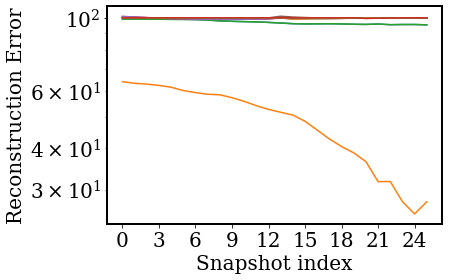

In [38]:
for percent_error_mode in percent_error_alllevels_wise:
    plt.plot(percent_error_mode)
    plt.yscale('log')
plt.xlabel('Snapshot index')
plt.xticks(np.arange(0,26,3))
plt.ylabel('Reconstruction Error')
plt.savefig('reconstruction_error_general_correct.png', dpi=600)

In [117]:
mode_index = 2    
first_mode = dmd.modes.T[mode_index].T[:,None]
dynamics = dmd.partial_dynamics(level=level)
print('dynamics shape in a level:',dynamics.shape)
first_mode_dynamics = dynamics[mode_index][None,:]
print(dynamics[mode_index][None,:].shape)
#modes.dot(dynamics).T.shape
#first_mode.dot(first_mode_dynamics).T.shape
reconstuctured_snapshots_from_first_mode = first_mode.dot(first_mode_dynamics).T
print('shape of recons snap:',reconstuctured_snapshots_from_first_mode.shape)

dynamics shape in a level: (2, 26)


IndexError: index 2 is out of bounds for axis 0 with size 2

0
percent_reconstruction_error: -4.007203899424728 18.03407080054373 63.51146742280536
percent_reconstruction_error: -2.1495369091378365 15.5841980889286 63.5928525657774
percent_reconstruction_error: -0.8770974196298782 14.329284598072919 63.569518147429605
percent_reconstruction_error: 0.004318234014088236 13.12444316670899 63.5180566816794
percent_reconstruction_error: 0.846760306993846 12.426010396590724 63.621721015088895
percent_reconstruction_error: 1.238675611663866 11.208902304748984 63.5795732589342
percent_reconstruction_error: 1.8569564245828225 11.740329955428809 63.7935191176778
percent_reconstruction_error: 1.690142114738869 10.924651653860955 63.57991085125554
percent_reconstruction_error: 1.9127920667142286 10.878843014005023 63.67629354355849
percent_reconstruction_error: 1.7597978895566084 10.121754494527316 63.568551304955975
percent_reconstruction_error: 1.8010062357433416 9.98408000063589 63.61221717436532
percent_reconstruction_error: 1.7190751248939862 9.7760979

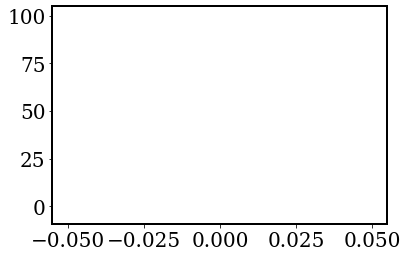

In [31]:
percent_error_mode_wise = []
for level in np.arange(0,3,1):
    recons_data = dmd.partial_reconstructed_data(level=level, node=None)
    print(level)
    #print(recons_data.T[0].shape, PIVEC_ALL[_].shape)
    for _ in range(recons_data.shape[-1]):
        recons_error = PIVEC_ALL[_]-np.array(recons_data.T[_]).real
        #print(recons_error.shape,PIVEC_ALL[_].shape )
        frobenius_norm = np.linalg.norm([recons_error])
        x_norm = np.linalg.norm(np.array(recons_data.T[_]))
        original_norm = np.linalg.norm([PIVEC_ALL[_]])
        #percent_reconstruction_error = (frobenius_norm/original_norm)*100
        percent_reconstruction_error = ((original_norm-x_norm)/original_norm)*100
        print('percent_reconstruction_error:',percent_reconstruction_error,frobenius_norm, original_norm)
        percent_error_mode_wise.append(percent_reconstruction_error)
        
for percent_error_mode in percent_error_mode_wise:
    plt.plot(percent_error_mode)

In [145]:
np.ma.masked_less((PIVEC_ALL[0]), 0.0003)

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20)

In [150]:
PIVEC_ALL[0][PIVEC_ALL[0] < 0.00001] = 0
print(min(PIVEC_ALL[1]))

2.38715e-13


In [152]:
dmd.eigs.real

array([1.00113999, 1.12024909, 1.05065824, 1.05065824, 1.1148952 ,
       0.81136322, 0.81136322, 0.75177905, 0.75177905, 0.97417177,
       0.97417177, 1.42940752, 0.34729499, 0.57689065])

In [153]:
dmd.eigs.imag

array([-2.73953484e-16, -5.79053161e-16, -1.83446280e-01,  1.83446280e-01,
       -1.77635684e-15, -3.73345977e-01,  3.73345977e-01,  6.04591634e-01,
       -6.04591634e-01, -5.47056244e-01,  5.47056244e-01, -1.55621211e-11,
       -8.74858430e-14, -8.46568323e-13])

In [159]:
dmd.time_window_amplitudes(22,23).real

array([-62.945713  ,  13.58541851, -55.37671431,  16.76726134,
        16.76726134,  11.84404806])

In [32]:
for i in range(1, 3):
    print('level for reconstruction work:',i)
    modes = dmd.partial_modes(level=i, node=None)
    partial_reconstructed_data += modes.dot(partial_dynamics(dmd, level=i,node=None))
    
    print(partial_reconstructed_data.shape)
    for ndx, mode in enumerate(partial_reconstructed_data.T):
        print('reconstructed level and frame:',(i,ndx))

        #df_original = pd.read_csv('../../../dens_%s.index'%(ndx), delimiter = " ",header=None, names=["X", "Y", "Z",'D'])
        df_original_cube = np.array(PIVEC_ALL[ndx])
        #df_original_cube.to_csv('df_original_cube_%s_density' % (ndx), sep=' ',index=False)
        #insert('df_original_cube_%s_density' % (ndx),string)
        recons_error = df_original_cube-np.array(mode).real
        print('recons_error_shape:',recons_error.shape)
        #recons_error_cube = np.array(recons_error).reshape(504000,6)
        #columns = [f'col_{num}' for num in range(6)]
        #index = [f'index_{num}' for num in range(504000)]
        #df_reshape_recons_error = pd.DataFrame(recons_error_cube, columns=columns, index=index)
        #df_reshape_recons_error.to_csv('rcnserror_%s_density_level_%s' % (ndx,i), sep=' ',index=False)
        #insert('rcnserror_%s_density_level_%s' % (ndx,i),string)
        #mode_0_reshape = np.array(mode).reshape(504000,6)

        #mse = (np.square(df_original['D']-np.array(mode).real)).mean(axis=None)
        #print(mse)
        frobenius_norm = np.linalg.norm(recons_error)
        original_norm = np.linalg.norm(df_original_cube)
        percent_reconstruction_error = (frobenius_norm/original_norm)*100
        print('percent_reconstruction_error:',percent_reconstruction_error)
        #RECONS_ERROR_PERCENT.append(percent_reconstruction_error)


level for reconstruction work: 1
(3456000, 26)
reconstructed level and frame: (1, 0)
recons_error_shape: (3456000,)
percent_reconstruction_error: 28.579607013628394
reconstructed level and frame: (1, 1)
recons_error_shape: (3456000,)
percent_reconstruction_error: 27.205726758517773
reconstructed level and frame: (1, 2)
recons_error_shape: (3456000,)
percent_reconstruction_error: 25.551413501253457
reconstructed level and frame: (1, 3)
recons_error_shape: (3456000,)
percent_reconstruction_error: 22.867845397337792
reconstructed level and frame: (1, 4)
recons_error_shape: (3456000,)
percent_reconstruction_error: 21.090556495086503
reconstructed level and frame: (1, 5)
recons_error_shape: (3456000,)
percent_reconstruction_error: 19.99149038790787
reconstructed level and frame: (1, 6)
recons_error_shape: (3456000,)
percent_reconstruction_error: 19.479482049386146
reconstructed level and frame: (1, 7)
recons_error_shape: (3456000,)
percent_reconstruction_error: 17.348455540344325
reconstruc

ValueError: could not broadcast input array from shape (2,7) into shape (2,6)

In [33]:
def time_window_eigs_frequency_amplitude_growth_rate_func(self, t0, tend):
        """
        Get the frequencies relative to the modes of the bins embedded (partially
        or totally) in a given time window.

        :param float t0: start time of the window.
        :param float tend: end time of the window.
        :return: the frequencies for that time window.
        :rtype: numpy.ndarray
        """
        indexes = self.time_window_bins(t0, tend)
        eigs_freq_ampl_grow = []
        for idx in indexes:
            eigen_vals = [idx,dmd.partial_time_interval(idx[0], idx[1]),dmd.dmd_tree[idx].eigs]
            freq = np.log(dmd.dmd_tree[idx].eigs).imag/(2*np.pi)
            amplitudes = dmd.dmd_tree[idx].amplitudes
            growth_rate = np.log(dmd.dmd_tree[idx].eigs).real
            eigs_freq_ampl_grow.append((eigen_vals,freq,amplitudes,growth_rate))
        return eigs_freq_ampl_grow

time_window_eigs_frequency_amplitude_growth_rate = time_window_eigs_frequency_amplitude_growth_rate_func(dmd, 0, 26)
print('time_window_eigs_frequency_amplitude_growth_rate:',time_window_eigs_frequency_amplitude_growth_rate)


time_window_eigs_frequency_amplitude_growth_rate: [([array([0, 0]), {'t0': 0.0, 'tend': 26.0, 'delta': 26.0}, array([0.95808819+1.01232927e-01j, 0.99289918+2.41821185e-16j,
       0.95808819-1.01232927e-01j])], array([ 1.67543662e-02,  3.87622809e-17, -1.67543662e-02]), array([-31.82984668-1.69459718e+00j, -68.37832237+3.09535730e-12j,
       -31.82984668+1.69459718e+00j]), array([-0.03726422, -0.00712615, -0.03726422])), ([array([1, 0]), {'t0': 0.0, 'tend': 13.0, 'delta': 13.0}, array([0.87650841-0.30084926j, 0.87650841+0.30084926j])], array([-0.05262241,  0.05262241]), array([-10.75960767-3.44299262j, -10.75960767+3.44299262j]), array([-0.07612284, -0.07612284])), ([array([1, 1]), {'t0': 13.0, 'tend': 26.0, 'delta': 13.0}, array([0.78437632+6.40773681e-14j])], array([1.30017055e-14]), array([-7.26065072-1.78701498e-12j]), array([-0.24286638])), ([array([2, 0]), {'t0': 0.0, 'tend': 6.5, 'delta': 6.5}, array([0.67656625-0.62849383j, 0.67656625+0.62849383j])], array([-0.11914011,  0.119

In [34]:
for ndx, each in enumerate(time_window_eigs_frequency_amplitude_growth_rate):
    #print('time window {}'.format(each[0]))
    print(ndx)
    print('eigenvals {}'.format(each[0]))
    print('frequency {}'.format(each[1]))
    print('amplitude {}'.format(each[2]))
    print('growth rate {}'.format(each[3]))

0
eigenvals [array([0, 0]), {'t0': 0.0, 'tend': 26.0, 'delta': 26.0}, array([0.95808819+1.01232927e-01j, 0.99289918+2.41821185e-16j,
       0.95808819-1.01232927e-01j])]
frequency [ 1.67543662e-02  3.87622809e-17 -1.67543662e-02]
amplitude [-31.82984668-1.69459718e+00j -68.37832237+3.09535730e-12j
 -31.82984668+1.69459718e+00j]
growth rate [-0.03726422 -0.00712615 -0.03726422]
1
eigenvals [array([1, 0]), {'t0': 0.0, 'tend': 13.0, 'delta': 13.0}, array([0.87650841-0.30084926j, 0.87650841+0.30084926j])]
frequency [-0.05262241  0.05262241]
amplitude [-10.75960767-3.44299262j -10.75960767+3.44299262j]
growth rate [-0.07612284 -0.07612284]
2
eigenvals [array([1, 1]), {'t0': 13.0, 'tend': 26.0, 'delta': 13.0}, array([0.78437632+6.40773681e-14j])]
frequency [1.30017055e-14]
amplitude [-7.26065072-1.78701498e-12j]
growth rate [-0.24286638]
3
eigenvals [array([2, 0]), {'t0': 0.0, 'tend': 6.5, 'delta': 6.5}, array([0.67656625-0.62849383j, 0.67656625+0.62849383j])]
frequency [-0.11914011  0.11914